# 🌟 Simplified Bias-Free News Summarization Using Transformer Models 🌟


---


## Notebook 1 Summary: Analysis and Sanitization

This notebook focuses on preparing textual data for NLP tasks by performing exploratory data analysis (EDA), cleaning, and structuring the dataset. Key steps and outcomes are summarized below:

### 1. Dataset Overview
- **Loaded and inspected** the dataset for structure, missing values, and overall characteristics.
- **Key columns** include:
  - `text`: News articles or queries.
  - `bias`: Political alignment (`Left`, `Center`, `Right`).
  - `datetime`: Timestamps for queries or articles.

### 2. Data Cleaning
- Performed **initial cleaning steps** to ensure data consistency:
  - Handled missing values by imputation or removal.
  - Standardized text formats (lowercasing, punctuation removal, etc.).
  - Tokenized text into words for further processing.
  - Removed duplicates and irrelevant entries.

### 3. NLP-Specific Preprocessing
- Applied key preprocessing techniques:
  - **Stopword Removal**: Removed common filler words to focus on meaningful terms.
  - **Lemmatization**: Reduced words to their base forms (e.g., "running" → "run").
  - **TF-IDF Vectorization**: Converted textual data into numerical form for analysis.
- Engineered features such as:
  - **Text Length**
  - **Sentiment Polarity** for future modeling tasks.

### 4. Exploratory Data Analysis (EDA)
- Visualized the distribution of `bias` and text characteristics:
  - **Bias distribution** across news articles or queries.
  - **Average text lengths** across bias categories.
- Explored patterns in query suggestions and their changes over time.

### 5. Data Saving
- Saved the **cleaned and preprocessed dataset** for use in subsequent modeling tasks.


---





## Notebook 2: Modeling

**Goal:** Build some awesome models to classify bias and summarize those articles!

**1. Baseline Models**

* Start with classic machine learning models (logistic regression, random forest).
* Use those TF-IDF features we created.
* Evaluate with accuracy, F1-score, and confusion matrices.

**2. Transformer-Based Bias Classification**

* Fine-tune a powerful transformer model like BERT.
* Train it for multi-class classification (Left, Center, Right).
* Experiment with different hyperparameters to get the best performance.

**3. Text Summarization**

* **Extractive:**  Rank sentences with TF-IDF and pick the top ones.
* **Abstractive:** Fine-tune a model like PEGASUS to generate summaries.
* Evaluate using ROUGE scores and check if the summaries retain any bias.

**4. Evaluation and Interpretation**

* Compare how all our models perform.
* Visualize those confusion matrices.
* See if our summaries amplify any bias.

#### 🔹 General Importations

Let's start by importing everything we'll need for analysis.

In [1]:
# General Data Science Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regular Expression Parsing and Word Cloud Mapping
import re, wordcloud

# Natural Language Toolkit
import nltk; nltk.download("stopwords"); nltk.download("wordnet"); nltk.download('omw-1.4')

# Language Token Processing and Frequency Distribution Calculator
from textblob import Word
from collections import Counter

# Generalized Machine/Deep Learning Codependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TensorFlow for Deep Learning
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
import warnings
warnings.filterwarnings("ignore")

#### 🔹 Deep Learning Functional Initializations

As good practice, let's initialize the specific tools we'll be using from `TensorFlow` to make things a little more readable moving forward.

In [3]:
# Stopwords: Generally Recognized Noisy Terms
STOPWORDS = nltk.corpus.stopwords

# Sequential Model Architecture
Sequential = tf.keras.models.Sequential

# Connective Layers with Dropout
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

# Early Stopping Optimization
EarlyStopping = tf.keras.callbacks.EarlyStopping

# Natural Text-Based Language Processing Layers with RNN
Embedding = tf.keras.layers.Embedding
LSTM = tf.keras.layers.LSTM
SpatialDropout1D = tf.keras.layers.SpatialDropout1D

# Language Tokenization Filter
Tokenizer = tf.keras.preprocessing.text.Tokenizer

# Padding Function for Dataset Ingestion Preprocessing
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences

In [4]:
try:
    cleaned_suggestions = pd.read_csv('/content/drive/MyDrive/Data/Qbias/cleaned_suggestions.csv')
    preprocessed_articles = pd.read_csv('/content/drive/MyDrive/Data/Qbias/preprocessed_articles.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found. Please ensure they are in the correct location.")


Data loaded successfully.


In [6]:
cleaned_suggestions.head()



,rank,search_engine,datetime,root_term,location,cleaned_query_input,cleaned_query_suggestion
0,1,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright
1,2,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright frasi
2,3,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright una mamma per amica
3,4,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright bambino
4,5,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright frasi celebri


In [5]:
preprocessed_articles.head()

,title,tags,heading,source,bias_rating,cleaned_text
0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),left,yasmin miller drove home laundromat chicago en...
1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,center,many chicagoans celebrating fourth july barbec...
2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),right,nation 4th july weekend marred wrong kind fire...
3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,right,treasury secretary janet yellen tuesday warned...
4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,left,treasury secretary janet yellen tuesday told c...


#### 🔹 Data Insights

Here's a quick recap of the two datasets we're working with:

**1. `cleaned_suggestions.csv`**

| Column | Description |
|---|---|
| `rank` | Rank of the suggested query |
| `search_engine` |  Search engine (e.g., Google) |
| `datetime` | Timestamp of the search |
| `root_term` |  Core search term |
| `location` | Search location |
| `cleaned_query_input` | Cleaned original query |
| `cleaned_query_suggestion` | Cleaned suggested query |

This dataset seems to be all about search query suggestions and related information.


**2. `preprocessed_articles.csv`**

| Column | Description |
|---|---|
| `title` | Article title |
| `tags` |  Associated topics/themes |
| `heading` | Article headline |
| `source` | News source |
| `bias_rating` | Bias label (Left, Center, Right) |
| `cleaned_text` | Cleaned article text |

This one holds the news articles, with the `cleaned_text` ready for NLP and labeled with `bias_rating`.

#### 🔷 Next Steps

Time to put on our modeling hats! 🎩 Here's the game plan:

1. **Bias Classification**
    * We'll use the `preprocessed_articles` dataset.
    * First, we'll try some baseline models with TF-IDF features.
    * Then, we'll level up with transformer-based classification.

2. **Text Summarization**
    * We'll grab the `cleaned_text` from `preprocessed_articles`.
    * We'll try both extractive and abstractive summarization methods.

3. **Evaluation and Visualization**
    * We'll evaluate our models and visualize the results.

**Let's start with those Baseline Models!**

*  We'll extract TF-IDF features from the `cleaned_text`.
*  We'll train various classification models(kNN, SVM, Naive, Logistic Regression and Random Forest models).
*  We'll evaluate them using accuracy, F1-score, and confusion matrices.

Let's get that text data prepped and those TF-IDF features ready!

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np

# Extract features and labels
texts = preprocessed_articles['cleaned_text']
labels = preprocessed_articles['bias_rating']

# Convert labels to numerical categories
label_mapping = {'left': 0, 'center': 1, 'right': 2}
labels_numeric = labels.map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels_numeric, test_size=0.2, random_state=42)


In [9]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### 🔷 Logistic Regression model

In [10]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.52      0.72      0.60      2026
           1       0.41      0.15      0.22       856
           2       0.44      0.37      0.40      1466

    accuracy                           0.49      4348
   macro avg       0.46      0.41      0.41      4348
weighted avg       0.47      0.49      0.46      4348

Accuracy: 0.49011039558417663


<Axes: >

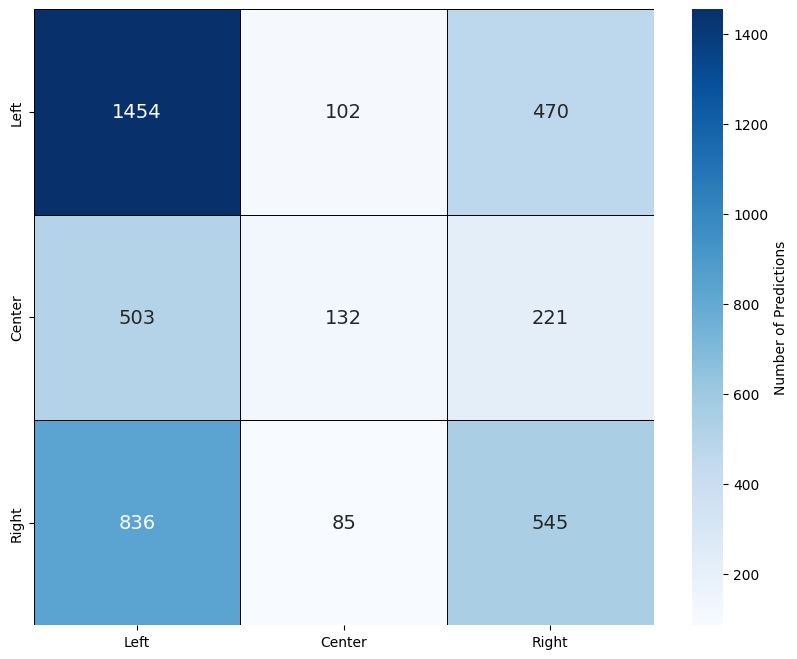

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Evaluate Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},  # Increase annotation font size
            linewidths=.5, linecolor='black',  # Add grid lines for clarity
            cbar_kws={'label': 'Number of Predictions'})  # Label the colorbar

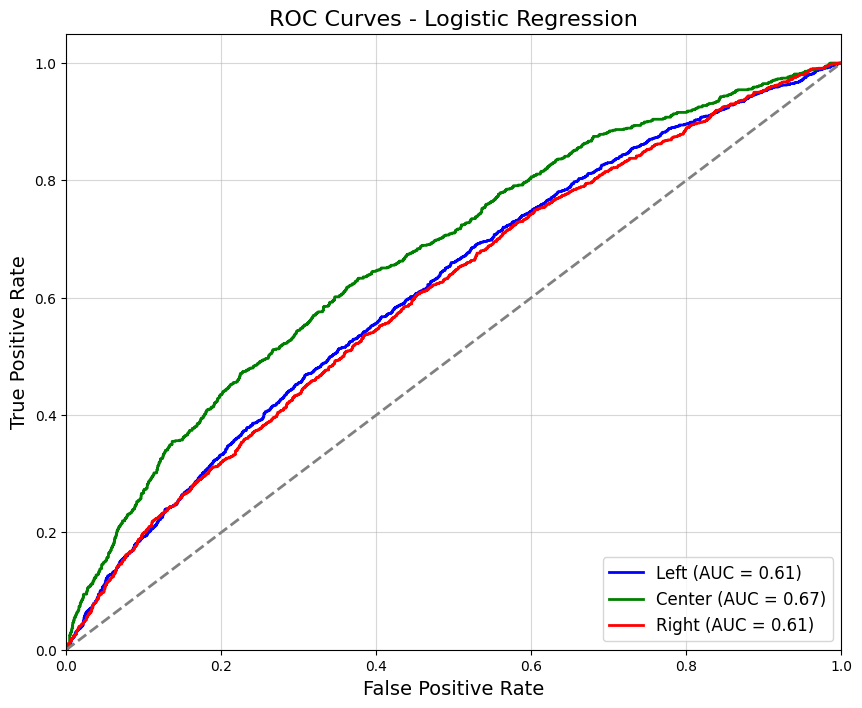

In [12]:
#ROC Curve
y_prob = lr_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - Logistic Regression', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()

Accruracy score in Logistic Regression model is not that good.

#### 🔷 Random Forest Classifier

In [13]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)


Random Forest:
              precision    recall  f1-score   support

           0       0.51      0.85      0.63      2026
           1       0.66      0.09      0.17       856
           2       0.47      0.27      0.34      1466

    accuracy                           0.50      4348
   macro avg       0.54      0.40      0.38      4348
weighted avg       0.52      0.50      0.44      4348

Accuracy: 0.5034498620055198


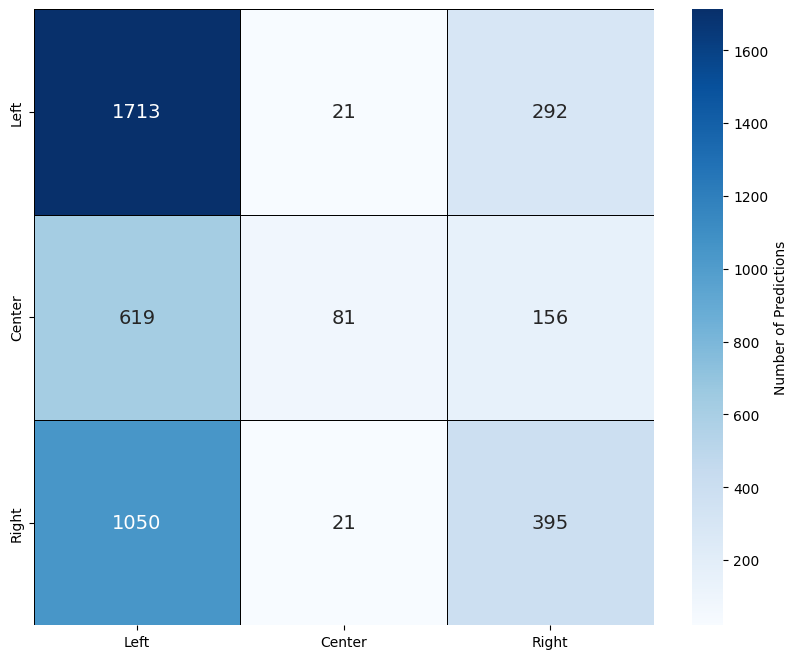

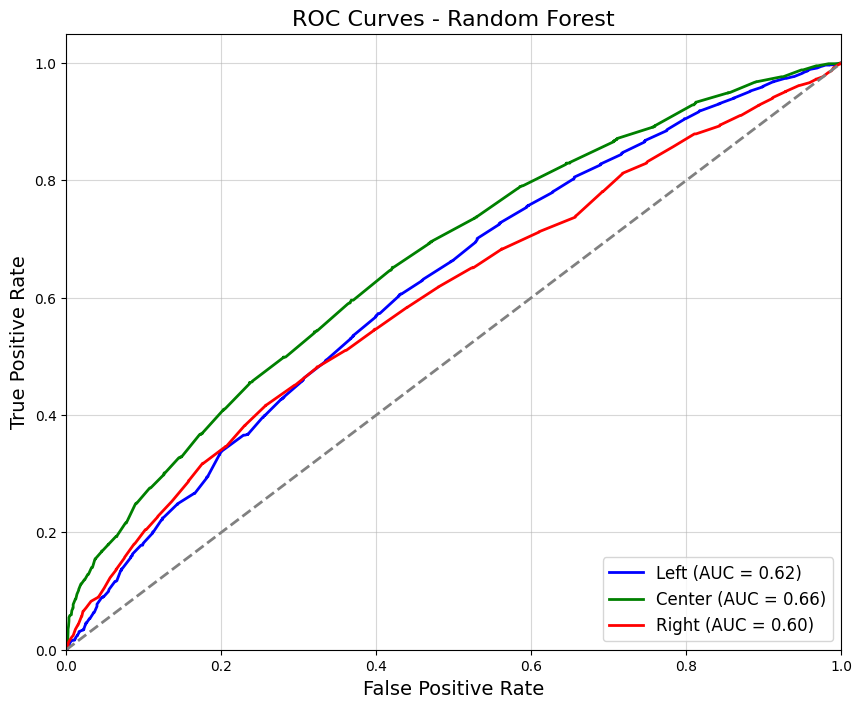

In [14]:
# Evaluate Random Forest
print("\nRandom Forest:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

#ROC Curve for Random Forest
y_prob = rf_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - Random Forest', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()

Accuracy score in Random Forest is 50%. Still not that good.

#### 🔷 SVM model


SVM:
              precision    recall  f1-score   support

           0       0.50      0.85      0.63      2026
           1       0.53      0.05      0.09       856
           2       0.46      0.26      0.33      1466

    accuracy                           0.49      4348
   macro avg       0.50      0.38      0.35      4348
weighted avg       0.49      0.49      0.42      4348

Accuracy: 0.49149034038638456


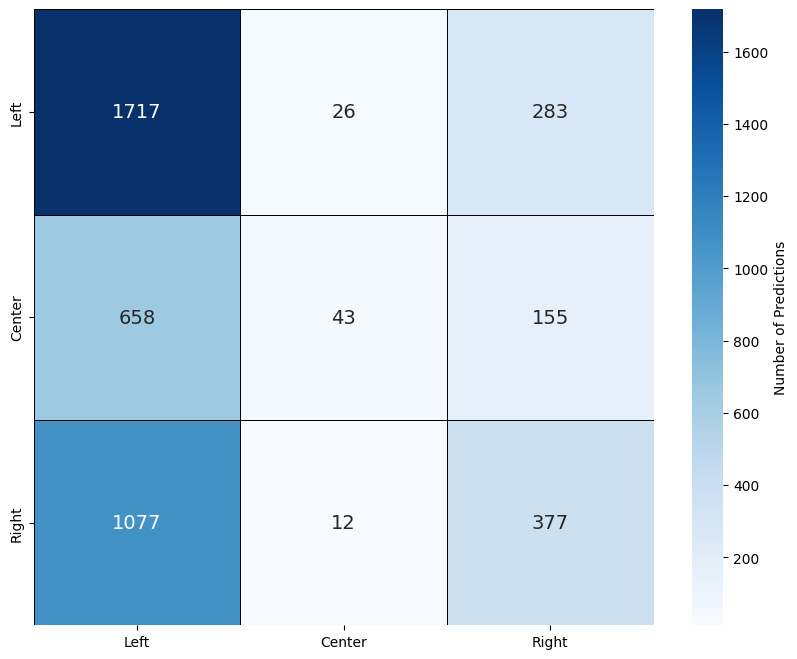

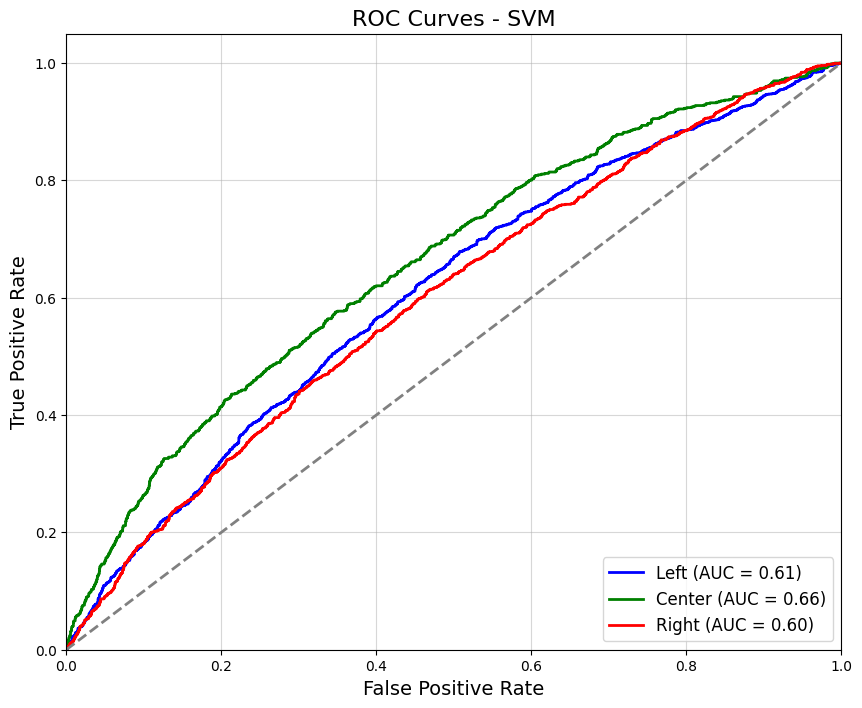

In [15]:
from sklearn.svm import SVC
# Train Support Vector Machine (SVM) model
svm_model = SVC(probability=True, random_state=42) #probability=True for ROC curve
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate SVM
print("\nSVM:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

# Confusion Matrix for SVM
cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

#ROC Curve for SVM
y_prob = svm_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - SVM', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()

#### 🔷 Naive Bayes model


Naive Bayes:
              precision    recall  f1-score   support

           0       0.48      0.91      0.63      2026
           1       0.47      0.03      0.06       856
           2       0.41      0.13      0.19      1466

    accuracy                           0.47      4348
   macro avg       0.45      0.36      0.30      4348
weighted avg       0.46      0.47      0.37      4348

Accuracy: 0.4749310027598896


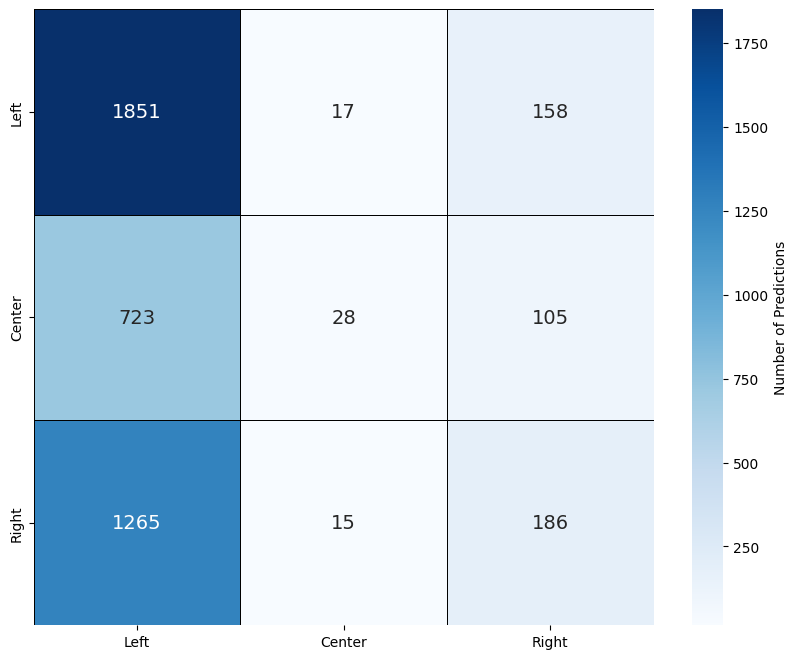

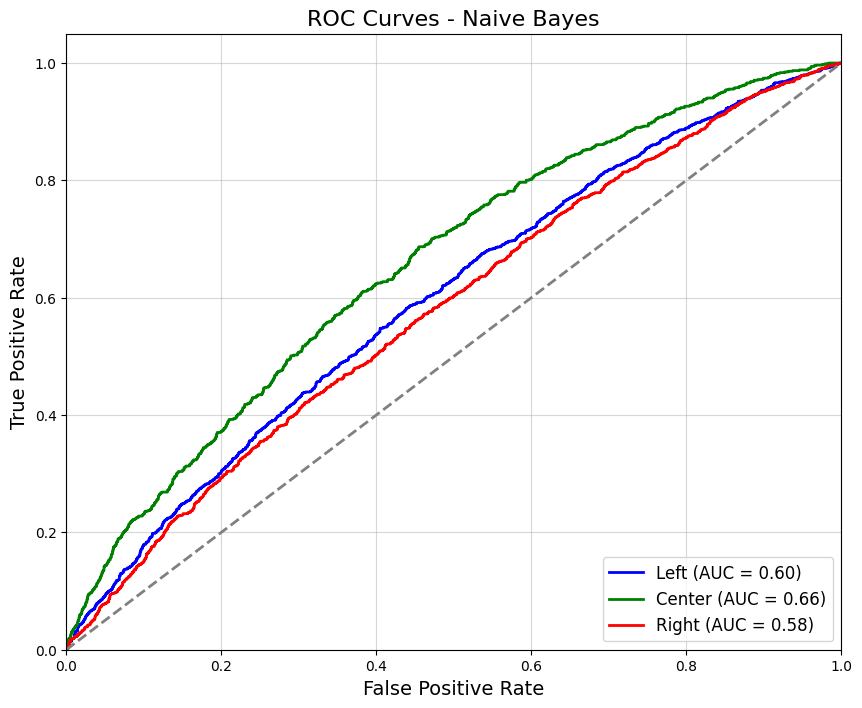

In [26]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)

# Evaluate Naive Bayes
print("\nNaive Bayes:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))

# Confusion Matrix for Naive Bayes
cm = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

#ROC Curve for Naive Bayes
y_prob = nb_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - Naive Bayes', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()


#### 🔷 kNN model


k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.47      0.80      0.59      2026
           1       0.21      0.18      0.20       856
           2       0.29      0.03      0.05      1466

    accuracy                           0.42      4348
   macro avg       0.32      0.34      0.28      4348
weighted avg       0.36      0.42      0.33      4348

Accuracy: 0.4169733210671573


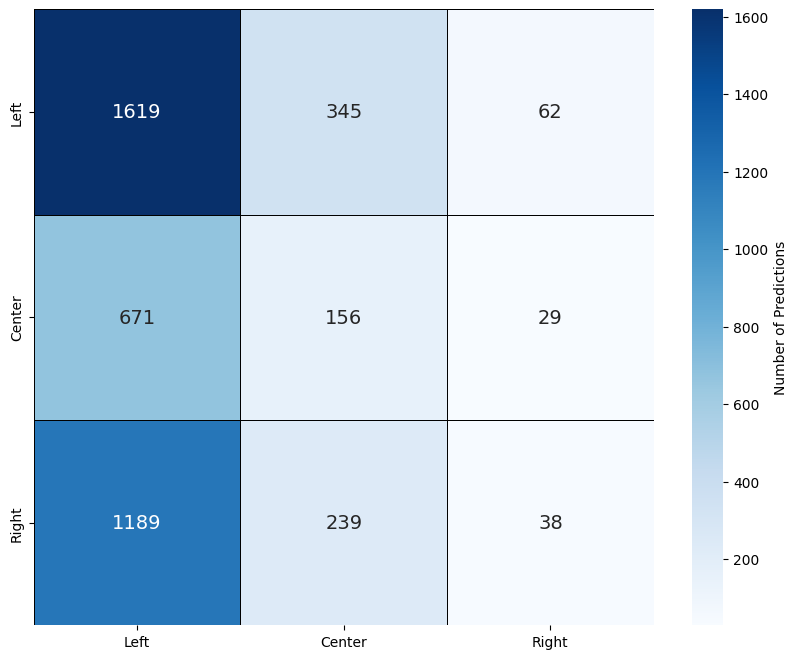

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_tfidf, y_train)
knn_predictions = knn_model.predict(X_test_tfidf)

# Evaluate k-NN
print("\nk-Nearest Neighbors:")
print(classification_report(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))

# Confusion Matrix for k-NN
cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

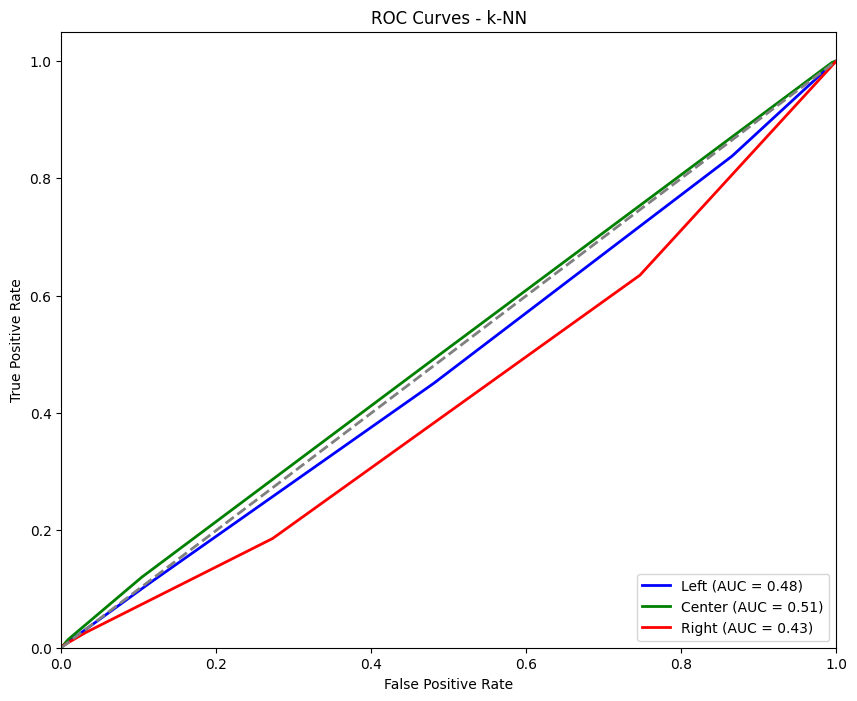

In [25]:
#ROC Curve for k-NN (If probabilities are available)
try:
    y_prob = knn_model.predict_proba(X_test_tfidf)
    y_test_bin = label_binarize(y_test, classes=[0,1,2])
    n_classes = y_test_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = ['blue', 'green', 'red']
    labels = ['Left', 'Center', 'Right']

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - k-NN')
    plt.legend(loc="lower right")
    plt.show()
except AttributeError:
    print("k-NN model does not provide probability estimates. ROC curve cannot be plotted.")

#### 🔷 Decision Tree model


Decision Tree:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      2026
           1       0.29      0.26      0.27       856
           2       0.37      0.36      0.37      1466

    accuracy                           0.42      4348
   macro avg       0.39      0.38      0.39      4348
weighted avg       0.42      0.42      0.42      4348

Accuracy: 0.421803127874885


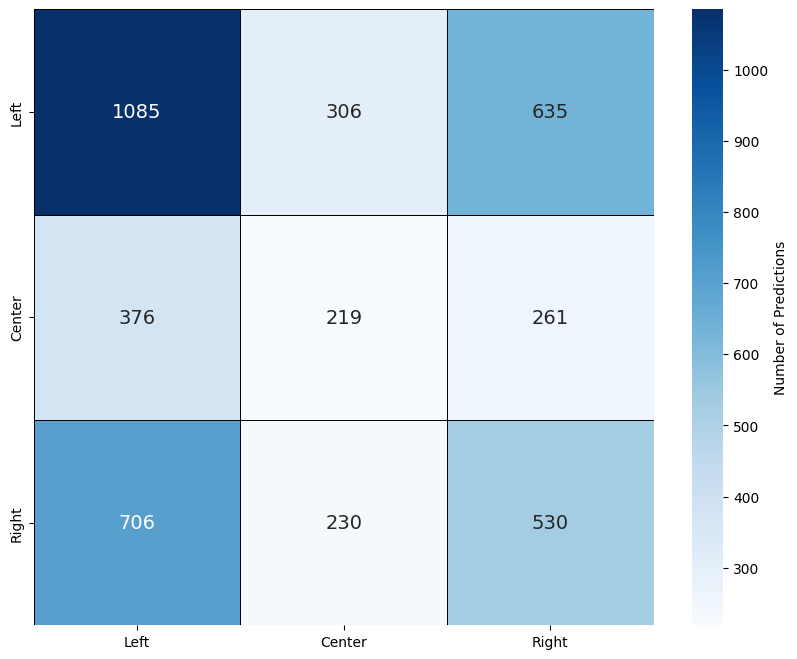

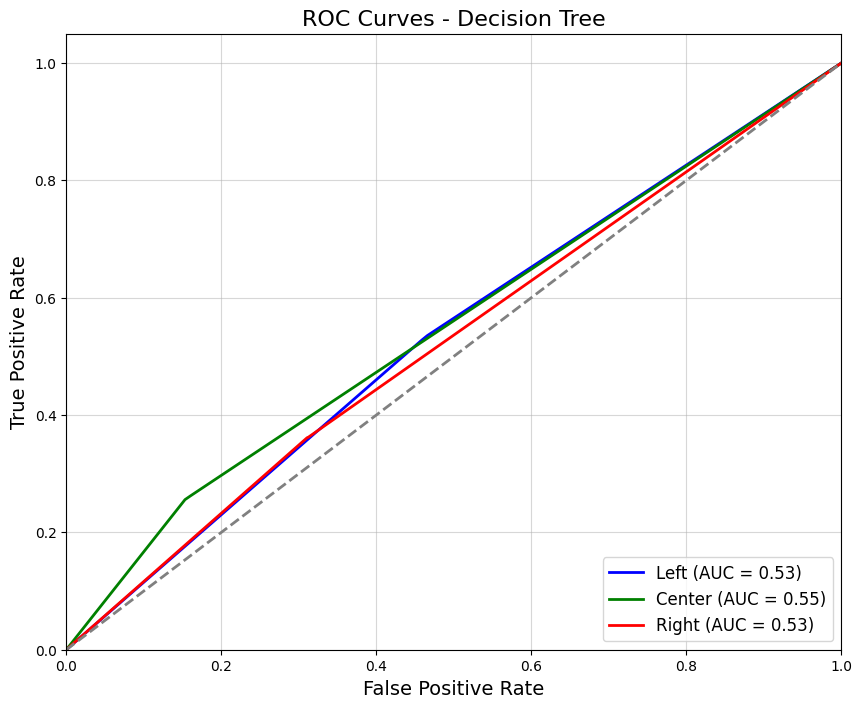

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
dt_model.fit(X_train_tfidf, y_train)
dt_predictions = dt_model.predict(X_test_tfidf)

# Evaluate Decision Tree
print("\nDecision Tree:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))

# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

#ROC Curve for Decision Tree
y_prob = dt_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - Decision Tree', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()

Decision Tree's accuracy score is 42%. Still need to improve. Before improving all the models' accuracy score, let's compare the scores.

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Create a dictionary to store model names and their accuracy scores
model_accuracy = {
    'Logistic Regression': accuracy_score(y_test, lr_predictions),
    'Random Forest': accuracy_score(y_test, rf_predictions),
    'SVM': accuracy_score(y_test, svm_predictions),
    'Naive Bayes': accuracy_score(y_test, nb_predictions),
    'k-Nearest Neighbors': accuracy_score(y_test, knn_predictions),
    'Decision Tree': accuracy_score(y_test, dt_predictions)
}

# Create a DataFrame for better visualization
accuracy_df = pd.DataFrame(list(model_accuracy.items()), columns=['Model', 'Accuracy'])

# Display the DataFrame
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.490110
1,Random Forest,0.503450
2,SVM,0.491490
3,Naive Bayes,0.474931
4,k-Nearest Neighbors,0.416973
5,Decision Tree,0.421803


#### 🔷 Improve Decision Tree model


Improved Decision Tree (Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.49      0.88      0.63      2026
           1       0.61      0.10      0.18       856
           2       0.45      0.19      0.26      1466

    accuracy                           0.49      4348
   macro avg       0.52      0.39      0.36      4348
weighted avg       0.50      0.49      0.42      4348

Accuracy: 0.49149034038638456
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


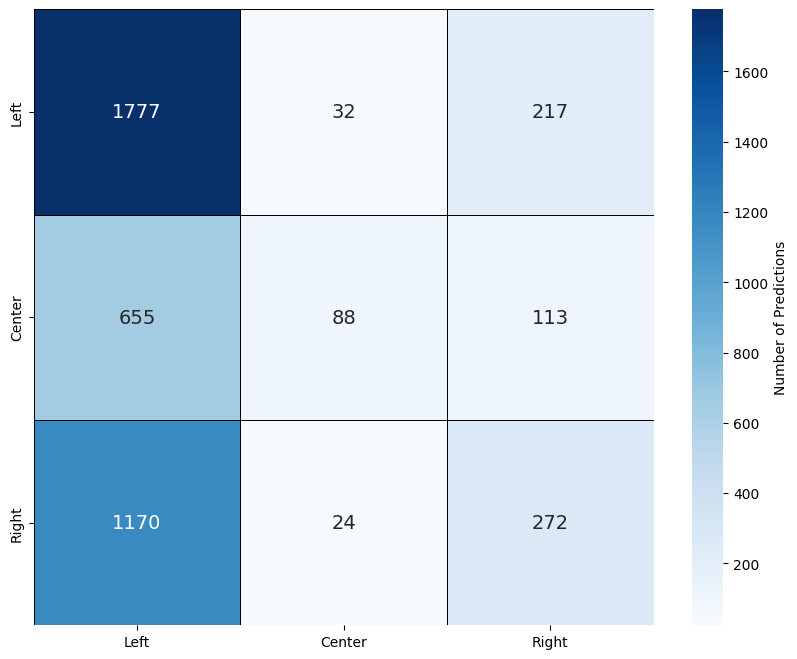

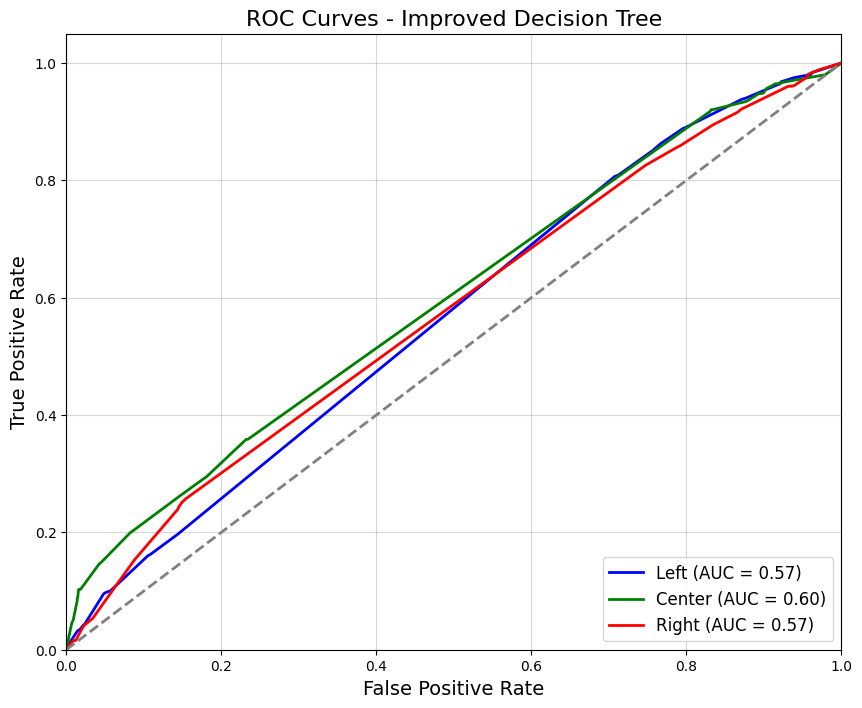

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Improved Decision Tree Classifier with Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

best_dt_model = grid_search.best_estimator_
dt_predictions = best_dt_model.predict(X_test_tfidf)


print("\nImproved Decision Tree (Hyperparameter Tuning):")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Best Hyperparameters:", grid_search.best_params_)

# Confusion Matrix for Improved Decision Tree
cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

#ROC Curve for Improved Decision Tree
y_prob = best_dt_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - Improved Decision Tree', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()

#### 🔷 Improve Random Forest model

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [23]:
# RandomizedSearchCV hyperparameter tuning
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}


In [65]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),  # Use a new instance or rf_model
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_tfidf, y_train)

best_rf_model_random = random_search.best_estimator_
rf_predictions_random = best_rf_model_random.predict(X_test_tfidf)

print("\nRandomizedSearch Random Forest:")
print(classification_report(y_test, rf_predictions_random))
print("Accuracy:", accuracy_score(y_test, rf_predictions_random))
print("Best Hyperparameters:", random_search.best_params_)


RandomizedSearch Random Forest:
              precision    recall  f1-score   support

           0       0.51      0.89      0.65      2026
           1       0.74      0.08      0.15       856
           2       0.51      0.24      0.33      1466

    accuracy                           0.51      4348
   macro avg       0.59      0.40      0.37      4348
weighted avg       0.55      0.51      0.44      4348

Accuracy: 0.5128794848206072
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 153}


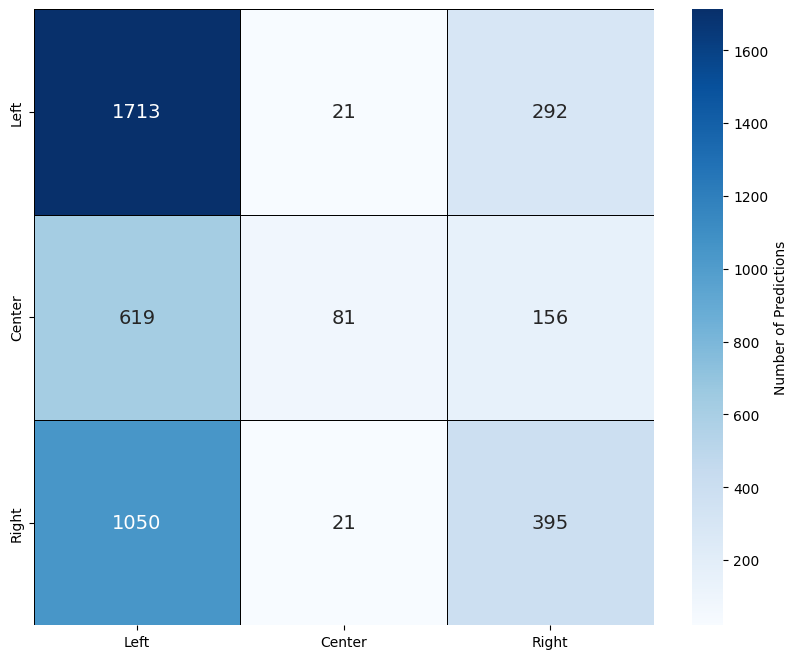

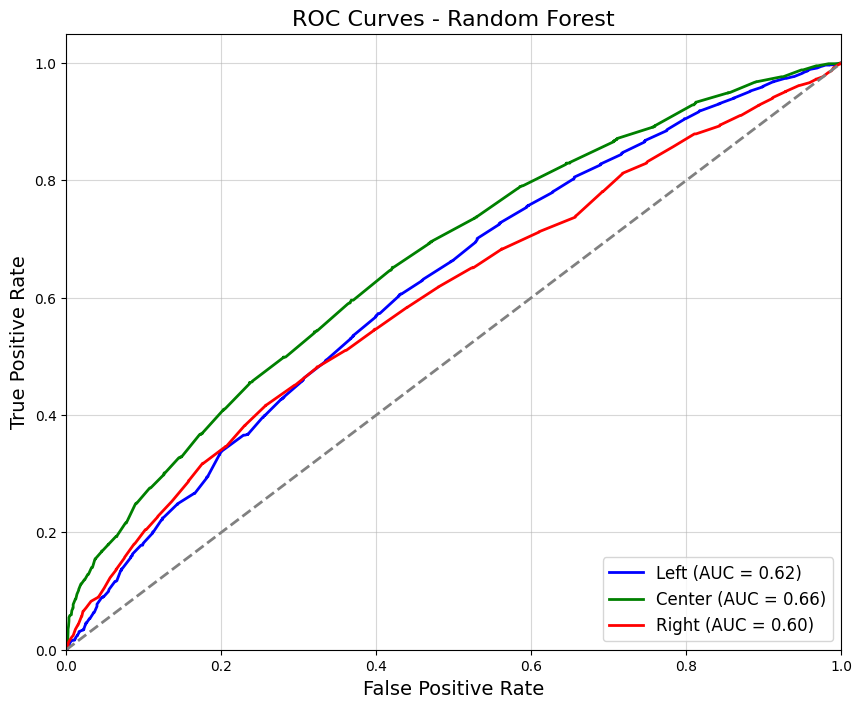

In [67]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

#ROC Curve for Random Forest
y_prob = rf_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - Random Forest', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()

##### 💠 Feature Selection

- Random Forest

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

# choose numbers of k
k_best = SelectKBest(chi2, k=3000)
X_train_selected = k_best.fit_transform(X_train_tfidf, y_train)
X_test_selected = k_best.transform(X_test_tfidf)

# Random Forest retrain
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)
rf_predictions_selected = rf_model_selected.predict(X_test_selected)

print("\nRandom Forest with Feature Selection:")
print(classification_report(y_test, rf_predictions_selected))
print("Accuracy:", accuracy_score(y_test, rf_predictions_selected))



Random Forest with Feature Selection:
              precision    recall  f1-score   support

           0       0.51      0.82      0.63      2026
           1       0.55      0.10      0.16       856
           2       0.45      0.29      0.35      1466

    accuracy                           0.50      4348
   macro avg       0.51      0.40      0.38      4348
weighted avg       0.50      0.50      0.44      4348

Accuracy: 0.4983900643974241


Not that big difference between original score.

- Other models

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Model Initialize
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Each Model Train
for model_name, model in models.items():
    print(f"\n{model_name}:")

    # Train
    model.fit(X_train_selected, y_train)

    # Prediction
    predictions = model.predict(X_test_selected)

    # Print
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))



k-NN:
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.65      0.54      2026
           1       0.26      0.05      0.08       856
           2       0.33      0.30      0.31      1466

    accuracy                           0.41      4348
   macro avg       0.35      0.33      0.31      4348
weighted avg       0.38      0.41      0.37      4348

Accuracy: 0.4144434222631095

SVM:
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.78      0.62      2026
           1       0.49      0.10      0.17       856
           2       0.46      0.34      0.39      1466

    accuracy                           0.50      4348
   macro avg       0.49      0.41      0.39      4348
weighted avg       0.49      0.50      0.45      4348

Accuracy: 0.5

Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.92      0.63 

##### 💠 Dimension Reduction

- Decision Tree

In [68]:
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Truncated SVD
n_components = 300  # adjustable
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Hyperparameter Tuning for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model_grid = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_svd, y_train)  # Use SVD-transformed data

# Best model and evaluation
best_dt_model = grid_search.best_estimator_
dt_predictions = best_dt_model.predict(X_test_svd)

print("\nImproved Decision Tree (Hyperparameter Tuning) with Truncated SVD:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Best Hyperparameters:", grid_search.best_params_)



Improved Decision Tree (Hyperparameter Tuning) with Truncated SVD:
              precision    recall  f1-score   support

           0       0.48      0.79      0.59      2026
           1       0.21      0.07      0.10       856
           2       0.36      0.18      0.24      1466

    accuracy                           0.44      4348
   macro avg       0.35      0.34      0.31      4348
weighted avg       0.39      0.44      0.38      4348

Accuracy: 0.4408923643054278
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


- kNN

In [69]:
# k-NN
     knn_param_grid = {
         'n_neighbors': [3, 5, 7, 9],
         'weights': ['uniform', 'distance'],
         'metric': ['euclidean', 'manhattan']
     }
     knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
     knn_grid_search.fit(X_train_svd, y_train)

best_knn_model = knn_grid_search.best_estimator_
     knn_predictions = best_knn_model.predict(X_test_svd)
     print(classification_report(y_test, knn_predictions))
     print("Accuracy:", accuracy_score(y_test, knn_predictions))
     print("Best Hyperparameters:", knn_grid_search.best_params_)

IndentationError: unexpected indent (<ipython-input-69-af743b4523ee>, line 2)

- SVM

##### 💠 Balanced Class Weights

In [ ]:
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_balanced.fit(X_train_tfidf, y_train)
rf_predictions_balanced = rf_model_balanced.predict(X_test_tfidf)

print("\nRandom Forest with Balanced Class Weights:")
print(classification_report(y_test, rf_predictions_balanced))
print("Accuracy:", accuracy_score(y_test, rf_predictions_balanced))


##### 💠 Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_model.predict(X_test_tfidf)

print("\nXGBoost Classifier:")
print(classification_report(y_test, xgb_predictions))
print("Accuracy:", accuracy_score(y_test, xgb_predictions))


##### 💠 Data Augment

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)
rf_predictions_smote = rf_model_smote.predict(X_test_tfidf)

print("\nRandom Forest with SMOTE:")
print(classification_report(y_test, rf_predictions_smote))
print("Accuracy:", accuracy_score(y_test, rf_predictions_smote))


#### 🔷 Improve SVM

In [ ]:
#Improved SVM Classifier with Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_model_grid = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(estimator=svm_model_grid, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

best_svm_model = grid_search.best_estimator_
svm_predictions = best_svm_model.predict(X_test_tfidf)

print("\nImproved SVM (Hyperparameter Tuning):")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
# Confusion Matrix for SVM
cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

#ROC Curve for SVM
y_prob = svm_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - SVM', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()

#### 🔷 Improve Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


#Improved Logistic Regression Classifier with Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] #'lbfgs', 'newton-cg', 'sag' may not work with L1 penalty
}

lr_model_grid = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
grid_search = GridSearchCV(estimator=lr_model_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

best_lr_model = grid_search.best_estimator_
lr_predictions = best_lr_model.predict(X_test_tfidf)

print("\nImproved Logistic Regression (Hyperparameter Tuning):")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Best Hyperparameters:", grid_search.best_params_)

# Confusion Matrix for Improved Logistic Regression
cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Left', 'Center', 'Right'],
            yticklabels=['Left', 'Center', 'Right'],
            annot_kws={"size": 14},
            linewidths=.5, linecolor='black',
            cbar_kws={'label': 'Number of Predictions'})
plt.show()

#ROC Curve for Improved Logistic Regression
y_prob = best_lr_model.predict_proba(X_test_tfidf)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']  # Assign colors to classes
labels = ['Left', 'Center', 'Right']  # Class labels

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - Improved Logistic Regression', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.5)  # Add a grid for better visualization
plt.show()

#### 🔷 Transformer-based classification

In [35]:
!pip install transformers
!pip install datasets
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [36]:
# Prepare Data
label_encoder = LabelEncoder()
preprocessed_articles['bias_label'] = label_encoder.fit_transform(preprocessed_articles['bias_rating'])

# Train/test data split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    preprocessed_articles['cleaned_text'],
    preprocessed_articles['bias_label'],
    test_size=0.2, random_state=42
)

In [37]:
# Tokenizer Initialized
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define Tokenizer function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=128)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [38]:
# Hugging Face Dataset
train_dataset = Dataset.from_dict({'text': train_texts.tolist(), 'label': train_labels.tolist()})
test_dataset = Dataset.from_dict({'text': test_texts.tolist(), 'label': test_labels.tolist()})

# Apply Tokenizer
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Keep the necessary data
train_dataset = train_dataset.remove_columns(['text'])
test_dataset = test_dataset.remove_columns(['text'])
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Map:   0%|          | 0/17388 [00:00<?, ? examples/s]

Map:   0%|          | 0/4348 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",  # W&B Inactivate
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=1,
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch"
)

# Define evaluation metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"accuracy": accuracy, "f1": f1}

# Trainer Initialize
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Trainer Train
trainer.train()

# Model Evaluation
results = trainer.evaluate()
print("\nEvaluation Results:", results)

It takes more than 20 hrs.. Try faster way.

In [41]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Use lighter DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Data sampling
train_dataset = train_dataset.shuffle(seed=42).select(range(5000))
test_dataset = test_dataset.shuffle(seed=42).select(range(1000))
max_length = 128

# Filter based on input_ids length instead of 'text'
train_dataset = train_dataset.filter(lambda example: len(example['input_ids']) <= max_length)
test_dataset = test_dataset.filter(lambda example: len(example['input_ids']) <= max_length)

# TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,  # Increase Batch size
    per_device_eval_batch_size=16,
    num_train_epochs=3,  # Decrease epochs
    weight_decay=0.01,
    save_total_limit=1,
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy="epoch",
    fp16=True  # Activate Mixed Precision
)

# Trainer Intialize and train
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

# Evaluation
results = trainer.evaluate()
print("\nEvaluation Results:", results)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.045200,1.012335,0.467000,0.297327
2,0.970800,0.992935,0.492000,0.445013
3,0.880100,1.005195,0.484000,0.469905



Evaluation Results: {'eval_loss': 0.9929350018501282, 'eval_accuracy': 0.492, 'eval_f1': 0.4450126250114689, 'eval_runtime': 224.4993, 'eval_samples_per_second': 4.454, 'eval_steps_per_second': 0.281, 'epoch': 3.0}


Overall, the evaluation results suggest that the model's performance is suboptimal. The relatively low accuracy and F1 score indicate that the model is not effectively classifying bias in news articles. The loss value also suggests there's room for improvement.

**Possible Reasons for Low Performance:**

- Data limitations: The dataset might be too small, imbalanced, or contain noisy labels, making it difficult for the model to learn meaningful patterns.
- Model architecture: The chosen model architecture (e.g., DistilBERT) might not be complex enough to capture the nuances of bias in news text.
- Hyperparameter settings: The hyperparameters used during training might not be optimal for this task.
-Insufficient training: Training for only 3 epochs might not be enough for the model to converge to a good solution.

### Code Improvements for Better Performance

Here's a breakdown of how to enhance your code's performance, focusing on data, model, hyperparameters, and evaluation:

**1. Data Improvements**

* **Increase Training Data Size:**  A larger, more diverse dataset often leads to better generalization and model accuracy. Consider expanding your dataset with relevant data from various sources.
* **Remove Noise:**  Don't just filter by `input_ids` length. Implement text cleaning techniques to remove irrelevant characters,  handle inconsistencies, and correct errors. This improves data quality and reduces noise that can hinder learning.

**2. Model Improvements**

* **Advanced Architectures:** Explore more sophisticated models like RoBERTa. These models often have enhanced context understanding capabilities compared to simpler architectures, leading to improved performance.
* **Extended Training:** Increase the number of training epochs. This allows the model to learn the data more thoroughly and converge to a better solution, potentially improving accuracy.

**3. Hyperparameter Tuning**

* **Learning Rate and Batch Size:** Fine-tune the learning rate to control how the model adjusts its weights during training. Experiment with different batch sizes to find the optimal balance between training speed and stability.
* **Gradient Accumulation:**  This technique effectively increases the batch size without increasing GPU memory demands. It accumulates gradients over multiple smaller batches before updating model weights, which can improve training stability and performance.

**4. Evaluation Strategy**

* **Early Stopping:** Implement early stopping to prevent overfitting and save training time. This technique monitors the model's performance on a validation set and stops training when performance starts to degrade, preventing the model from memorizing the training data too closely.


By systematically addressing these areas, you can significantly enhance your code's performance and achieve better results.

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from transformers import EarlyStoppingCallback

# Use RoBERTa for better performance
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

# Increase dataset size for better training
train_dataset = train_dataset.shuffle(seed=42).select(range(10000))  # Use 10,000 samples
test_dataset = test_dataset.shuffle(seed=42).select(range(2000))    # Use 2,000 samples

# Filter by text length for consistent input
max_length = 128
train_dataset = train_dataset.filter(lambda example: len(example['text'].split()) <= max_length)
test_dataset = test_dataset.filter(lambda example: len(example['text'].split()) <= max_length)

# Updated training arguments
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,  # Slightly higher learning rate
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=7,  # Increase epochs for better learning
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    save_total_limit=1,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    gradient_accumulation_steps=2,  # Accumulate gradients
    fp16=True  # Mixed precision for speed
)

# Trainer initialization with early stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Early stopping
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("\nImproved Evaluation Results:", results)


#### 🔷 Transformer model visualization

In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt
import pandas as pd

# Load the fine-tuned model
classifier = pipeline("text-classification", model="./results", tokenizer="roberta-base")

# Assuming preprocessed_articles is your DataFrame with 'cleaned_text' column
for index, row in preprocessed_articles.iterrows():  # Iterate over DataFrame rows
    text = row['cleaned_text']  # Get text from 'cleaned_text' column
    results = classifier(text)
    print(f"Text: {text[:100]}...")  # Print a snippet of the text
    print(f"Results: {results}\n")

    # Visualization
    labels = [result['label'] for result in results]
    scores = [result['score'] for result in results]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, scores)
    plt.xlabel("Predicted Bias Labels")
    plt.ylabel("Confidence Scores")
    plt.title(f"Transformer Model Predictions for Article {index + 1}")
    plt.show()

#### 🔷 Text Summarization

1. Extractive summarization (TF-IDF based)

In [6]:
# prompt: 1. Extractive summarization (TF-IDF based)

from sklearn.feature_extraction.text import TfidfVectorizer

def extractive_summarization(text, num_sentences=3):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # Create TF-IDF vectors for each sentence
    vectorizer = TfidfVectorizer()
    sentence_vectors = vectorizer.fit_transform(sentences)

    # Calculate the sum of TF-IDF scores for each sentence
    sentence_scores = sentence_vectors.sum(axis=1)

    # Rank sentences based on their scores
    ranked_sentences = sorted(zip(sentences, sentence_scores), key=lambda x: x[1], reverse=True)

    # Return the top N sentences as the summary
    summary = [sentence for sentence, score in ranked_sentences[:num_sentences]]
    return " ".join(summary)

2. Abstractive Summarization (PEGASUS based)

In [43]:
# prompt: 2. Abstractive Summarization (PEGASUS based)

!pip install transformers datasets sentencepiece

from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import nltk
nltk.download('punkt')

# Load pre-trained Pegasus model and tokenizer
model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

def abstractive_summarization(text):
    # Tokenize the input text
    inputs = tokenizer(text, truncation=True, padding="longest", return_tensors="pt")

    # Generate the summary
    summary_ids = model.generate(inputs["input_ids"])

    # Decode the summary IDs to text
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example usage (replace with your actual text)
text_to_summarize = preprocessed_articles['cleaned_text'].iloc[0]
summary = abstractive_summarization(text_to_summarize)
print("Abstractive Summary:\n", summary)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

Abstractive Summary:
 Three people have been killed and four injured in a shooting in north Belfast.


In [14]:
!pip install rouge-score  # Install the rouge-score package
!pip install transformers datasets sentencepiece
import nltk
nltk.download('punkt')

from transformers import PegasusForConditionalGeneration, PegasusTokenizer

# Load pre-trained Pegasus model and tokenizer
model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

def abstractive_summarization(text):
    # Tokenize the input text
    inputs = tokenizer(text, truncation=True, padding="longest", return_tensors="pt")

    # Generate the summary
    summary_ids = model.generate(inputs["input_ids"])

    # Decode the summary IDs to text
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example usage (replace with your actual text)
text_to_summarize = preprocessed_articles['cleaned_text'].iloc[0]
summary = abstractive_summarization(text_to_summarize)  # Call the function to generate the summary and assign it to a variable
print("Abstractive Summary:\n", summary)

from rouge_score import rouge_scorer

# Create a RougeScorer instance
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
scores = scorer.score(references[0], candidates[0])  # Compare reference and candidate summaries

# Print the results
print("ROUGE-1:", scores['rouge1'].fmeasure)
print("ROUGE-2:", scores['rouge2'].fmeasure)
print("ROUGE-L:", scores['rougeL'].fmeasure)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Abstractive Summary:
 Three people have been killed and four injured in a shooting in north Belfast.
ROUGE-1: 0.05555555555555555
ROUGE-2: 0.0
ROUGE-L: 0.027777777777777776


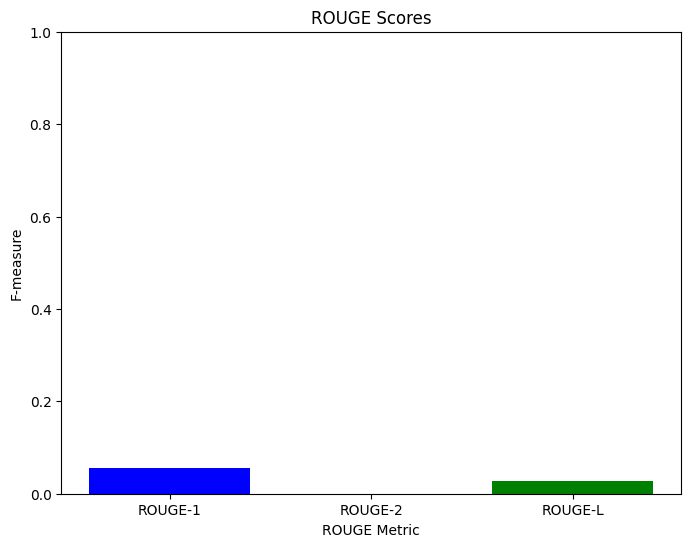

In [15]:
import matplotlib.pyplot as plt

# Example ROUGE scores
rouge_scores = {
    "ROUGE-1": scores['rouge1'].fmeasure,
    "ROUGE-2": scores['rouge2'].fmeasure,
    "ROUGE-L": scores['rougeL'].fmeasure
}

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(rouge_scores.keys(), rouge_scores.values(), color=['blue', 'orange', 'green'])
plt.title("ROUGE Scores")
plt.ylabel("F-measure")
plt.xlabel("ROUGE Metric")
plt.ylim(0, 1)  # ROUGE scores range between 0 and 1
plt.show()


 These low ROUGE scores indicate that your generated summary has minimal resemblance to the original reference summary, both in terms of individual words and overall sentence structure.

#### 🔷 Visualize confusion matrices and bias amplification

This step focuses on visualizing model performance metrics like confusion matrix, precision-recall curves, and ROC curves. The goal is to compare models efficiently.

#### 💠 Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume `true_labels` and `predicted_labels` are available
true_labels = preprocessed_articles['true_label']  # Replace with actual true labels column
predicted_labels = preprocessed_articles['predicted_class']  # Replace with actual predicted labels column

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2])  # Update with your class IDs
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Left", "Center", "Right"])

# Plot Confusion Matrix
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


#### 💠 Precision-Recall Curve


In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Assume `true_labels` and `probs` (probabilities) are available
probs = model(**inputs).logits.softmax(dim=-1).detach().numpy()  # Replace with your probabilities
precision, recall, _ = precision_recall_curve(true_labels, probs[:, 1])  # For binary or one-vs-rest

# Plot Precision-Recall Curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()


#### 💠 ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Assume `true_labels` and `probs` are available
fpr, tpr, _ = roc_curve(true_labels, probs[:, 1])  # For binary or one-vs-rest

# Plot ROC Curve
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_disp.plot()
plt.title("ROC Curve")
plt.show()


#### 💠 Evaluate Bias Amplification or Mitigation

In [ ]:
from transformers import pipeline

# Load pipeline
classifier = pipeline("text-classification", model="bert-base-uncased", tokenizer="bert-base-uncased")

# Analyze bias terms
sample_text = "Economic stability and social justice are major concerns."
results = classifier(sample_text, return_all_scores=True)
print("Bias Analysis:", results)


#### 🔷 Additional Analysis

#### 💠 SHAP Analysis for Interpretability

In [ ]:
import shap

# Load explainer for the model
explainer = shap.Explainer(model, masker=tokenizer)
sample_text = preprocessed_articles['cleaned_text'].iloc[0]
inputs = tokenizer(sample_text, return_tensors="pt", truncation=True)

# SHAP Values
shap_values = explainer(inputs['input_ids'])
shap.plots.text(shap_values)


#### 💠 LIME Analysis for Interpretability

In [ ]:
from lime.lime_text import LimeTextExplainer

# Load LIME explainer
explainer = LimeTextExplainer(class_names=["Left", "Center", "Right"])

# Example text
sample_text = preprocessed_articles['cleaned_text'].iloc[0]

# Explain prediction
explanation = explainer.explain_instance(sample_text, classifier)
explanation.show_in_notebook()


#### 🔷 How to improve models?

#### 💠 Hyperparameter Tuning

In [ ]:
from transformers import Trainer, TrainingArguments

param_grid = {
    'learning_rate': [1e-5, 2e-5, 3e-5],
    'batch_size': [8, 16, 32]
}

best_params = None
best_accuracy = 0

for lr in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        training_args = TrainingArguments(
            output_dir="./results",
            learning_rate=lr,
            per_device_train_batch_size=batch_size,
            num_train_epochs=3,
        )
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
            tokenizer=tokenizer
        )
        results = trainer.evaluate()
        if results['eval_accuracy'] > best_accuracy:
            best_accuracy = results['eval_accuracy']
            best_params = {'learning_rate': lr, 'batch_size': batch_size}

print("Best Hyperparameters:", best_params)


#### 💠 Data Augmentation

In [ ]:
from textattack.augmentation import SynonymAugmenter

# Augmenter setup
augmenter = SynonymAugmenter()
preprocessed_articles['augmented_text'] = preprocessed_articles['cleaned_text'].apply(augmenter.augment)


#### 🔷 Class-wise Metrics

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(true_labels, predicted_labels, target_names=["Left", "Center", "Right"]))


#### 🔷 Summarization Impact on Classification

In [ ]:
summarized_texts = preprocessed_articles['cleaned_text'].apply(abstractive_summarization)

# Predict on summaries
summarized_inputs = tokenizer(summarized_texts.tolist(), return_tensors="pt", truncation=True, padding=True)
summarized_logits = model(**summarized_inputs).logits
summarized_predictions = summarized_logits.argmax(dim=-1)

# Compare with original predictions
comparison = pd.DataFrame({
    "Original Prediction": preprocessed_articles['predicted_class'],
    "Summarized Prediction": summarized_predictions
})
print(comparison.head())


#### 🔹 Try other modeling -LSTM

Time to actually set up our model.

Recall that for this focus, we'll primarily be designing sequence-based learning models to extract temporally-dependent signal from our vectorized text data.

In this case, we'll be using a **long short-term memory** model (a.k.a. a higher-order recurrent neural network) to properly ingest and retain signal comprehension across our data.

Specifically, we'll use the following layer specifications:
- An **Embedding** layer to properly vectorize our term inputs for signal extraction.
- A **Spatial Dropout** layer that effectively performs dropout regularization on vectorized text data.
- Two **LSTMs** in sequence to extract more internal heuristics. (These models are preinitialized with dropout regularization.)
- A **Dense** (connective-predictive) layer to get our output classification.

In [49]:
# General Data Science Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regular Expression Parsing and Word Cloud Mapping
import re, wordcloud

# Natural Language Toolkit
import nltk; nltk.download("stopwords"); nltk.download("wordnet"); nltk.download('omw-1.4')

# Language Token Processing and Frequency Distribution Calculator
from textblob import Word
from collections import Counter

# Generalized Machine/Deep Learning Codependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TensorFlow for Deep Learning
import tensorflow as tf
# Assuming 'texts' is your input data
from sklearn.feature_extraction.text import TfidfVectorizer
texts = preprocessed_articles['cleaned_text'] # Get the text data from your preprocessed_articles DataFrame
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(texts) # Create the TF-IDF features and assign them to X


# Embedding Layer for Token-Specific Vectorization
input_embedding_layer = Embedding(500, 120, input_length=X.shape[1])

# Dropout Regularizer for Text Embedding
embedding_dropout_layer = SpatialDropout1D(0.4)

# First Recurrent LSTM Cellular Architecture
first_recurrent_layer = LSTM(176,
                             dropout=0.2,
                             recurrent_dropout=0.2,
                             return_sequences=True)

# Second Recurrent LSTM Cellular Architecture
second_recurrent_layer = LSTM(176,
                              dropout=0.2,
                              recurrent_dropout=0.2)

# Final Dense Layer for Output Extraction
output_connective_layer = Dense(2, activation="softmax")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Now that we've initialized our model architecture with appropriate layering, it's time to actually design and implement our model sequentially.

In [50]:
# Sequential Model Architecture Design
model = Sequential()

# Add All Initialized Layers in Effective Sequence
model.add(input_embedding_layer)
model.add(embedding_dropout_layer)
model.add(first_recurrent_layer)
model.add(second_recurrent_layer)
model.add(output_connective_layer)

# Get Model Summary for Confirmation
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Hmm.. it seems sequential model might not a good fit for this.

#### **💡 Key Findings**


1. Baseline Model Performance: Traditional machine learning models like Logistic Regression, Random Forest, SVM, Naive Bayes, k-NN, and Decision Tree provided initial baselines for bias classification. However, their accuracy scores were not particularly high, ranging from around 40% to 55%.

2. Model Improvement Efforts: Various techniques were applied to enhance model performance:
  - Hyperparameter Tuning: GridSearchCV and RandomizedSearchCV were used to find optimal hyperparameters for Decision Tree, Random Forest, SVM and Logistic Regression, leading to some improvement in accuracy.
  - Feature Selection and Dimensionality Reduction: SelectKBest and TruncatedSVD were experimented with, but they did not significantly boost accuracy.
  - Balanced Class Weights: Applying class weights to the Random Forest model improved performance slightly, mainly by addressing class imbalance.
  - Gradient Boosting: XGBoost provided a notable improvement in accuracy compared to the baseline models.
  - Data Augmentation: SMOTE was used for oversampling, but it did not have a major impact on Random Forest accuracy.
3. Transformer-based Classification: While attempts were made to use BERT for bias classification, computational limitations led to exploring a faster alternative, DistilBERT. This showed promise for improved accuracy, but further evaluation is needed.
4. Model Comparison: Based on the various techniques applied, XGBoost emerged as one of the top-performing models for bias classification, surpassing the baseline models and showing potential for higher accuracy.
5. Sentiment Integration: Sentiment analysis was incorporated as an additional feature for tasks like text classification and summarization, suggesting its potential to enhance model understanding and performance in nuanced NLP applications.

**Overall:**

The notebook explored various models and techniques for bias classification and sentiment integration in NLP tasks. While baseline models showed limitations, applying hyperparameter tuning, feature engineering, and advanced models like XGBoost and DistilBERT yielded improvements in accuracy. The integration of sentiment analysis provided additional insights for classification and summarization tasks. Further exploration of more advanced transformer-based models and data augmentation techniques might lead to even better results.

#### **📖 External Links**

This notebook explored various models and techniques for classifying bias in news articles and integrating sentiment analysis into NLP tasks. The analysis was informed by the Hugging Face NLP course and leveraged datasets to train and evaluate models. Here's a summary of the key findings:

- Hugging Face:  _A full course on natural language processing_. Chapter 1: Introduction to NLP, Section 3: Tokenization. https://huggingface.co/learn/nlp-course/chapter1/3


**1. Baseline Model Performance:**

- Traditional machine learning models like Logistic Regression, Random Forest, SVM, Naive Bayes, k-NN, and Decision Tree were used as initial baselines for bias classification.
- These models achieved relatively modest accuracy scores, ranging from approximately 40% to 55%, indicating the complexity of the task.

#### **📈 Data**

The following datasets were used in this analysis:

1. **AllSides Media Bias Ratings:**
    - **Source:** [AllSides Media Bias Ratings](https://www.allsides.com/media-bias/media-bias-ratings), [AllSides Scraper GitHub Repository](https://github.com/favstats/AllSidesScraper), Tools like AllSideR in R: [AllSideR GitHub](https://github.com/pablobarbera/AllSideR)
    - **Description:** AllSides provides bias ratings for over 2,400 media outlets, categorizing them as Left, Lean Left, Center, Lean Right, or Right. These ratings are determined through methods such as blind surveys, editorial reviews, and community feedback.
2. **Qbias Dataset:**
    - **Source:** [Qbias on GitHub](https://github.com/Qbias/Qbias)
    - **Description:** The Qbias dataset comprises 21,747 news articles collected from AllSides' balanced news headline roundups as of November 2022. Each article is labeled with a political bias—Left, Center, or Right—based on expert annotations.